1. Gather data from SQLite database

In [1]:
# Import required libraries and dependencies
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import hvplot.pandas

In [2]:
#import dependency for SQLite database
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect("../Resources/perfume.db")

# Create a cursor object to execute SQL queries
cur = conn.cursor()

In [3]:
# Fetch all rows from the 'Review_Included' table
cur.execute("SELECT * FROM Reviews_Included")

# Fetch all rows from the 'Review_Included' table
rows = cur.fetchall()

# Close the cursor and connection
cur.close()
conn.close()

In [4]:
# Convert fetched data into a pandas DataFrame
# Get column names
columns = [col[0] for col in cur.description]
perfume_df = pd.DataFrame(rows, columns=columns)

# Display the first few rows of the DataFrame
perfume_df.head()

,name,company,image,for_gender,rating,number_votes,main accords,description,top notes,middle notes,base notes,longevity,sillage,gender_vote,price value
0,Angels' Share,By Kilian,https://fimgs.net/mdimg/perfume/375x500.62615.jpg,for women and men,4.31,682.0,"{'woody': 100.0, 'sweet': 92.6987, 'warm spicy...",Angels' Share by By Kilian is a Oriental Vanil...,['Cognac'],"['Cinnamon', 'Tonka Bean', 'Oak']","['Praline', 'Vanilla', 'Sandalwood']","{'very weak': 21, 'weak': 17, 'moderate': 107,...","{'intimate': 40, 'moderate': 187, 'strong': 15...","{'female': 40, 'more female': 39, 'unisex': 22...","{'way overpriced': 64, 'overpriced': 143, 'ok'..."
1,My Way,Giorgio Armani,https://fimgs.net/mdimg/perfume/375x500.62036.jpg,for women,3.57,1471.0,"{'white floral': 100.0, 'citrus': 60.4322, 'tu...",My Way by Giorgio Armani is a Floral fragrance...,"['Orange Blossom', 'Bergamot']","['Tuberose', 'Indian Jasmine']","['White Musk', 'Madagascar Vanilla', 'Virginia...","{'very weak': 49, 'weak': 84, 'moderate': 200,...","{'intimate': 127, 'moderate': 322, 'strong': 2...","{'female': 349, 'more female': 21, 'unisex': 4...","{'way overpriced': 38, 'overpriced': 121, 'ok'..."
2,Libre Intense,Yves Saint Laurent,https://fimgs.net/mdimg/perfume/375x500.62318.jpg,for women,4.02,858.0,"{'vanilla': 100.0, 'aromatic': 71.4216, 'sweet...",Libre Intense by Yves Saint Laurent is a Orien...,"['Lavender', 'Mandarin Orange', 'Bergamot']","['Lavender', 'Tunisian Orange Blossom', 'Jasmi...","['Madagascar Vanilla', 'Tonka Bean', 'Ambergri...","{'very weak': 24, 'weak': 12, 'moderate': 103,...","{'intimate': 39, 'moderate': 155, 'strong': 23...","{'female': 162, 'more female': 91, 'unisex': 7...","{'way overpriced': 11, 'overpriced': 59, 'ok':..."
3,Dior Homme 2020,Christian Dior,https://fimgs.net/mdimg/perfume/375x500.58714.jpg,for men,3.42,1402.0,"{'woody': 100.0, 'musky': 72.7229, 'amber': 53...",Dior Homme 2020 by Christian Dior is a Woody f...,"['Bergamot', 'Pink Pepper', 'elemi']","['Cashmere Wood', 'Atlas Cedar', 'Patchouli']","['Iso E Super', 'Haitian Vetiver', 'White Musk']","{'very weak': 125, 'weak': 83, 'moderate': 174...","{'intimate': 214, 'moderate': 370, 'strong': 1...","{'female': 3, 'more female': 1, 'unisex': 17, ...","{'way overpriced': 31, 'overpriced': 59, 'ok':..."
4,Acqua di Giò Profondo,Giorgio Armani,https://fimgs.net/mdimg/perfume/375x500.59532.jpg,for men,4.03,869.0,"{'aromatic': 100.0, 'marine': 93.2493, 'citrus...",Acqua di Giò Profondo by Giorgio Armani is a A...,"['Sea Notes', 'Aquozone', 'Bergamot', 'Green M...","['Rosemary', 'Cypress', 'Lavender', 'Mastic or...","['Mineral notes', 'Musk', 'Patchouli', 'Amber']","{'very weak': 59, 'weak': 66, 'moderate': 188,...","{'intimate': 115, 'moderate': 333, 'strong': 1...","{'female': 3, 'more female': 0, 'unisex': 5, '...","{'way overpriced': 32, 'overpriced': 84, 'ok':..."


In [5]:
# Remove unnecessary columns (at this point we have decided to use the main accords in lieu of the top, middle, and base notes for accuracy)
columns_to_remove = ['image', 'for_gender', 'description', 'gender_vote', 'price value', 'top notes', 'middle notes', 'base notes']

# Remove the specified columns
perfume_df = perfume_df.drop(columns=columns_to_remove)

# Rename the column 'main accords' to 'main_accords' in perfume_df
perfume_df.rename(columns={'main accords': 'main_accords'}, inplace=True)

# Display the DataFrame after dropping the specified columns
perfume_df.head()

,name,company,rating,number_votes,main_accords,longevity,sillage
0,Angels' Share,By Kilian,4.31,682.0,"{'woody': 100.0, 'sweet': 92.6987, 'warm spicy...","{'very weak': 21, 'weak': 17, 'moderate': 107,...","{'intimate': 40, 'moderate': 187, 'strong': 15..."
1,My Way,Giorgio Armani,3.57,1471.0,"{'white floral': 100.0, 'citrus': 60.4322, 'tu...","{'very weak': 49, 'weak': 84, 'moderate': 200,...","{'intimate': 127, 'moderate': 322, 'strong': 2..."
2,Libre Intense,Yves Saint Laurent,4.02,858.0,"{'vanilla': 100.0, 'aromatic': 71.4216, 'sweet...","{'very weak': 24, 'weak': 12, 'moderate': 103,...","{'intimate': 39, 'moderate': 155, 'strong': 23..."
3,Dior Homme 2020,Christian Dior,3.42,1402.0,"{'woody': 100.0, 'musky': 72.7229, 'amber': 53...","{'very weak': 125, 'weak': 83, 'moderate': 174...","{'intimate': 214, 'moderate': 370, 'strong': 1..."
4,Acqua di Giò Profondo,Giorgio Armani,4.03,869.0,"{'aromatic': 100.0, 'marine': 93.2493, 'citrus...","{'very weak': 59, 'weak': 66, 'moderate': 188,...","{'intimate': 115, 'moderate': 333, 'strong': 1..."


2. Preprocess dataset for it to be useful for the model. Perfumes that have a rating below 3.59 and have less than or equal to 100 votes have been removed from the dataset. Main accords have been divided for each perfume and a column has been added for the scent strength. The perfumes have been duplicated based on the number of scents in each one and we have 3393 entries for the model to work with at this point. Data with NaN values have been removed. So we have 2655 entries to work with for the model.

In [6]:
# Define the threshold for removing rows based on rating
rating_threshold = 3.59

# Filter the DataFrame to exclude rows with ratings at or below the threshold
perfume_df = perfume_df[perfume_df['rating'] > rating_threshold]

# Display the DataFrame after removing rows
print(perfume_df)

                           name             company  rating  number_votes  \
0                 Angels' Share           By Kilian    4.31         682.0   
2                 Libre Intense  Yves Saint Laurent    4.02         858.0   
4         Acqua di Giò Profondo      Giorgio Armani    4.03         869.0   
5             Le Male Le Parfum  Jean Paul Gaultier    4.26         690.0   
6    Beau De Jour Eau de Parfum            Tom Ford    4.25         729.0   
..                          ...                 ...     ...           ...   
473                 La Capitale             Xerjoff    4.13         187.0   
474                  DKNY Women         Donna Karan    3.87        2285.0   
475                       Toy 2            Moschino    3.80         940.0   
476                       Derby            Guerlain    4.38         389.0   
477                       Aimer     Pascal Morabito    3.71           7.0   

                                          main_accords  \
0    {'woody': 10

In [7]:
# Define the threshold for removing rows based on number of votes
votes_threshold = 100

# Filter the DataFrame to exclude rows with number of votes less than the threshold
perfume_df = perfume_df[perfume_df['number_votes'] >= votes_threshold]

# Display the DataFrame after removing rows
print(perfume_df)

                           name             company  rating  number_votes  \
0                 Angels' Share           By Kilian    4.31         682.0   
2                 Libre Intense  Yves Saint Laurent    4.02         858.0   
4         Acqua di Giò Profondo      Giorgio Armani    4.03         869.0   
5             Le Male Le Parfum  Jean Paul Gaultier    4.26         690.0   
6    Beau De Jour Eau de Parfum            Tom Ford    4.25         729.0   
..                          ...                 ...     ...           ...   
472                Laudano Nero     Tiziana Terenzi    4.13        1693.0   
473                 La Capitale             Xerjoff    4.13         187.0   
474                  DKNY Women         Donna Karan    3.87        2285.0   
475                       Toy 2            Moschino    3.80         940.0   
476                       Derby            Guerlain    4.38         389.0   

                                          main_accords  \
0    {'woody': 10

In [8]:
# Rename the DataFrame to reflect its cleaned state
# Make a copy to preserve the original DataFrame
cleaned_perfume_df = perfume_df.copy()
cleaned_perfume_df

,name,company,rating,number_votes,main_accords,longevity,sillage
0,Angels' Share,By Kilian,4.31,682.0,"{'woody': 100.0, 'sweet': 92.6987, 'warm spicy...","{'very weak': 21, 'weak': 17, 'moderate': 107,...","{'intimate': 40, 'moderate': 187, 'strong': 15..."
2,Libre Intense,Yves Saint Laurent,4.02,858.0,"{'vanilla': 100.0, 'aromatic': 71.4216, 'sweet...","{'very weak': 24, 'weak': 12, 'moderate': 103,...","{'intimate': 39, 'moderate': 155, 'strong': 23..."
4,Acqua di Giò Profondo,Giorgio Armani,4.03,869.0,"{'aromatic': 100.0, 'marine': 93.2493, 'citrus...","{'very weak': 59, 'weak': 66, 'moderate': 188,...","{'intimate': 115, 'moderate': 333, 'strong': 1..."
5,Le Male Le Parfum,Jean Paul Gaultier,4.26,690.0,"{'warm spicy': 100.0, 'vanilla': 72.2173, 'aro...","{'very weak': 18, 'weak': 31, 'moderate': 129,...","{'intimate': 80, 'moderate': 262, 'strong': 17..."
6,Beau De Jour Eau de Parfum,Tom Ford,4.25,729.0,"{'aromatic': 100.0, 'fresh spicy': 94.7562, 'l...","{'very weak': 30, 'weak': 19, 'moderate': 88, ...","{'intimate': 45, 'moderate': 190, 'strong': 19..."
...,...,...,...,...,...,...,...
472,Laudano Nero,Tiziana Terenzi,4.13,1693.0,"{'woody': 100.0, 'amber': 93.699, 'smoky': 68....","{'very weak': 41, 'weak': 38, 'moderate': 84, ...","{'intimate': 94, 'moderate': 245, 'strong': 42..."
473,La Capitale,Xerjoff,4.13,187.0,"{'fruity': 100.0, 'sweet': 92.341, 'amber': 85...","{'very weak': 5, 'weak': 9, 'moderate': 20, 'l...","{'intimate': 22, 'moderate': 36, 'strong': 53,..."
474,DKNY Women,Donna Karan,3.87,2285.0,"{'citrus': 100.0, 'aromatic': 97.6724, 'green'...","{'very weak': 23, 'weak': 44, 'moderate': 190,...","{'intimate': 71, 'moderate': 244, 'strong': 21..."
475,Toy 2,Moschino,3.80,940.0,"{'fruity': 100.0, 'floral': 73.9229, 'fresh': ...","{'very weak': 54, 'weak': 78, 'moderate': 147,...","{'intimate': 135, 'moderate': 200, 'strong': 1..."


In [9]:
print(cleaned_perfume_df.columns)

Index(['name', 'company', 'rating', 'number_votes', 'main_accords',
       'longevity', 'sillage'],
      dtype='object')


In [10]:
# Use dependency specifically for specialty parsing https://docs.python.org/3/library/ast.html
import ast

#Working to create a new entry for each scent creating multiple entries for each perfume based on the number of scents in it
# Parse the string representations of dictionaries in 'main accords' into separate columns
cleaned_perfume_df = cleaned_perfume_df.copy()

# Parse the string representations of dictionaries into actual dictionaries
cleaned_perfume_df['main_accords'] = cleaned_perfume_df['main_accords'].apply(ast.literal_eval)

# Expand the 'main_accords' column into separate columns
main_accords_df = pd.json_normalize(cleaned_perfume_df['main_accords'])

# Concatenate the expanded 'main_accords' dataframe with the original dataframe
cleaned_perfume_df = pd.concat([cleaned_perfume_df, main_accords_df], axis=1)

# Drop the original 'main_accords' column
cleaned_perfume_df.drop(columns=['main_accords'], inplace=True)

# Using cleaned_perfume_df
cleaned_perfume_df = cleaned_perfume_df.copy()

# Create a dataframe with 'name' and 'company' columns, along with each scent in 'main_accords' as a separate row
scent_df = cleaned_perfume_df[['name', 'company', 'woody', 'sweet', 'warm spicy', 'vanilla', 'cinnamon', 'amber', 'powdery', 'lactonic', 'aromatic']].melt(id_vars=['name', 'company'], var_name='scent', value_name='scent_strength').dropna()

# preview df
scent_df.head()

,name,company,scent,scent_strength
0,Angels' Share,By Kilian,woody,100.0000
1,Libre Intense,Yves Saint Laurent,woody,67.7451
2,Acqua di Giò Profondo,Giorgio Armani,woody,62.7869
3,Le Male Le Parfum,Jean Paul Gaultier,woody,60.2007
4,Beau De Jour Eau de Parfum,Tom Ford,woody,52.3889


In [11]:
# Create a copy of the dataframe
cleaned_perfume_df_copy = cleaned_perfume_df.copy()

# Melt the dataframe to have each scent as its own row
cleaned_perfume_df_melted = cleaned_perfume_df_copy.melt(id_vars=['name', 'company', 'rating', 'number_votes', 'longevity', 'sillage'], var_name='scent', value_name='scent_strength')

# Drop rows with NaN values in the 'scent_strength' column
cleaned_perfume_df_melted = cleaned_perfume_df_melted.dropna(subset=['scent_strength'])

# Reset the index
cleaned_perfume_df_melted.reset_index(drop=True, inplace=True)

# Display the resulting dataframe
cleaned_perfume_df_melted

,name,company,rating,number_votes,longevity,sillage,scent,scent_strength
0,Angels' Share,By Kilian,4.31,682.0,"{'very weak': 21, 'weak': 17, 'moderate': 107,...","{'intimate': 40, 'moderate': 187, 'strong': 15...",woody,100.0000
1,Libre Intense,Yves Saint Laurent,4.02,858.0,"{'very weak': 24, 'weak': 12, 'moderate': 103,...","{'intimate': 39, 'moderate': 155, 'strong': 23...",woody,67.7451
2,Acqua di Giò Profondo,Giorgio Armani,4.03,869.0,"{'very weak': 59, 'weak': 66, 'moderate': 188,...","{'intimate': 115, 'moderate': 333, 'strong': 1...",woody,62.7869
3,Le Male Le Parfum,Jean Paul Gaultier,4.26,690.0,"{'very weak': 18, 'weak': 31, 'moderate': 129,...","{'intimate': 80, 'moderate': 262, 'strong': 17...",woody,60.2007
4,Beau De Jour Eau de Parfum,Tom Ford,4.25,729.0,"{'very weak': 30, 'weak': 19, 'moderate': 88, ...","{'intimate': 45, 'moderate': 190, 'strong': 19...",woody,52.3889
...,...,...,...,...,...,...,...,...
3388,NaN,NaN,NaN,NaN,NaN,NaN,conifer,57.7621
3389,Chanel N°22,Chanel,4.26,1208.0,"{'very weak': 21, 'weak': 18, 'moderate': 72, ...","{'intimate': 45, 'moderate': 124, 'strong': 11...",Champagne,62.1377
3390,NaN,NaN,NaN,NaN,NaN,NaN,camphor,46.5055
3391,NaN,NaN,NaN,NaN,NaN,NaN,savory,84.0410


3. Specific data cleaning for a clustering model begins here.

In [12]:
# Drop 'longevity' and 'sillage' columns as they are not useful for the clustering model
cleaned_perfume_df_melted.drop(['longevity', 'sillage'], axis=1, inplace=True)

# Display the resulting dataframe
print(cleaned_perfume_df_melted)

                            name             company  rating  number_votes  \
0                  Angels' Share           By Kilian    4.31         682.0   
1                  Libre Intense  Yves Saint Laurent    4.02         858.0   
2          Acqua di Giò Profondo      Giorgio Armani    4.03         869.0   
3              Le Male Le Parfum  Jean Paul Gaultier    4.26         690.0   
4     Beau De Jour Eau de Parfum            Tom Ford    4.25         729.0   
...                          ...                 ...     ...           ...   
3388                         NaN                 NaN     NaN           NaN   
3389                 Chanel N°22              Chanel    4.26        1208.0   
3390                         NaN                 NaN     NaN           NaN   
3391                         NaN                 NaN     NaN           NaN   
3392  Un Jardin Apres la Mousson              Hermès    3.98        3208.0   

          scent  scent_strength  
0         woody        100.00

In [13]:
# Sort the dataframe by the 'name' column in alphabetical order
cleaned_perfume_df_melted_sorted = cleaned_perfume_df_melted.sort_values(by='name')

# Reset the index
cleaned_perfume_df_melted_sorted.reset_index(drop=True, inplace=True)

# Drop rows with NaN values in the 'name' column
cleaned_perfume_df_melted_sorted.dropna(subset=['name'], inplace=True)

# Display the resulting dataframe
cleaned_perfume_df_melted_sorted

,name,company,rating,number_votes,scent,scent_strength
0,02 L'Air du Desert Marocain,Tauer Perfumes,4.43,4568.0,warm spicy,100.0000
1,02 L'Air du Desert Marocain,Tauer Perfumes,4.43,4568.0,musky,45.1861
2,02 L'Air du Desert Marocain,Tauer Perfumes,4.43,4568.0,green,70.2955
3,02 L'Air du Desert Marocain,Tauer Perfumes,4.43,4568.0,woody,55.8338
4,02 L'Air du Desert Marocain,Tauer Perfumes,4.43,4568.0,aromatic,67.0314
...,...,...,...,...,...,...
2650,Zahrat Hawai,Al-Rehab,3.81,212.0,aromatic,61.3975
2651,Zahrat Hawai,Al-Rehab,3.81,212.0,white floral,61.2162
2652,Zahrat Hawai,Al-Rehab,3.81,212.0,fresh spicy,47.5000
2653,Zahrat Hawai,Al-Rehab,3.81,212.0,floral,76.5721


In [14]:
# Merge 'name' and 'company' into one column
cleaned_perfume_df_melted_sorted['perfume'] = cleaned_perfume_df_melted_sorted['name'] + ' - ' + cleaned_perfume_df_melted_sorted['company']

# Drop the 'name' and 'company' columns
cleaned_perfume_df_melted_sorted.drop(columns=['name', 'company'], inplace=True)

# Set the merged column as the index
cleaned_perfume_df_melted_sorted.set_index('perfume', inplace=True)

# Display the resulting dataframe
cleaned_perfume_df_melted_sorted

,rating,number_votes,scent,scent_strength
perfume,,,,
02 L'Air du Desert Marocain - Tauer Perfumes,4.43,4568.0,warm spicy,100.0000
02 L'Air du Desert Marocain - Tauer Perfumes,4.43,4568.0,musky,45.1861
02 L'Air du Desert Marocain - Tauer Perfumes,4.43,4568.0,green,70.2955
02 L'Air du Desert Marocain - Tauer Perfumes,4.43,4568.0,woody,55.8338
02 L'Air du Desert Marocain - Tauer Perfumes,4.43,4568.0,aromatic,67.0314
...,...,...,...,...
Zahrat Hawai - Al-Rehab,3.81,212.0,aromatic,61.3975
Zahrat Hawai - Al-Rehab,3.81,212.0,white floral,61.2162
Zahrat Hawai - Al-Rehab,3.81,212.0,fresh spicy,47.5000


4. Machine Model creation starts here.

In [15]:
#Simplify dataframe name for model use
perfume_model_df = cleaned_perfume_df_melted_sorted.copy()

In [16]:
print(type(perfume_model_df))

<class 'pandas.core.frame.DataFrame'>


In [19]:
# Pivot the dataframe to create the heatmap
heatmap_data = perfume_model_df.pivot_table(values='rating', index='perfume', columns='scent')

# Extracting data from the dataframe
z_values = heatmap_data.values  # Your rating values
x_values = heatmap_data.columns  # Your scent categories
y_values = heatmap_data.index    # Your perfume names

fig = go.Figure(data=go.Heatmap(
    z=z_values,
    x=x_values,
    y=y_values,
    hoverongaps=False  # Disable hovering over gaps
))

# Set the axis labels
fig.update_layout(
    xaxis_title="Scent",
    yaxis_title="Perfume"
)

fig.show()

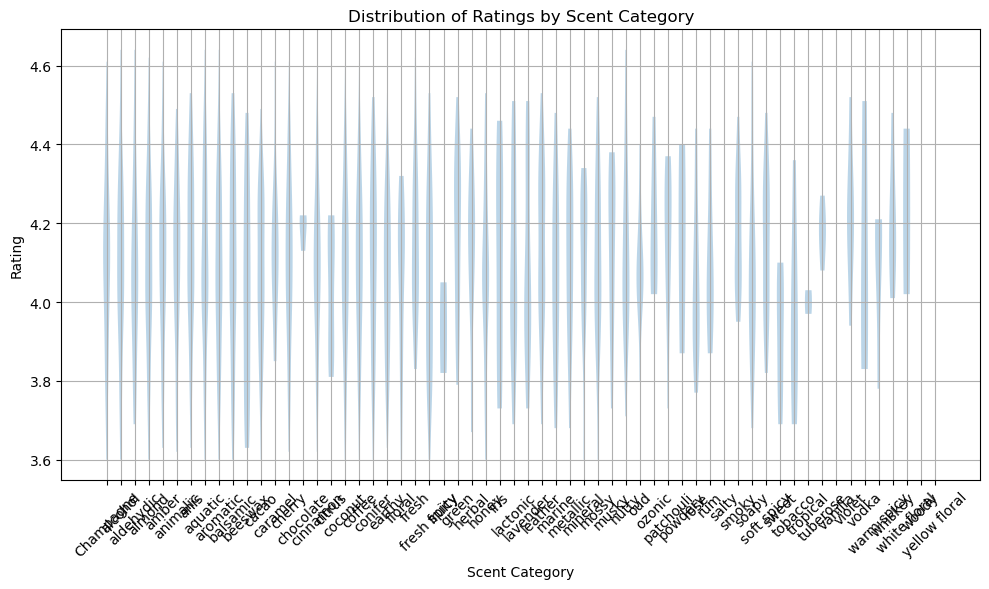

In [21]:
import matplotlib.pyplot as plt

# Create a dictionary to store ratings for each scent category
scent_ratings = {}

# Populate the dictionary with ratings for each scent category
for scent, group in perfume_model_df.groupby('scent'):
    scent_ratings[scent] = group['rating'].tolist()

# Create a list to store ratings for each scent category
ratings_by_scent = [scent_ratings[scent] for scent in perfume_model_df['scent'].unique()]

# Create a violin plot
plt.figure(figsize=(10, 6))
plt.violinplot(ratings_by_scent, showmeans=False, showextrema=False)
plt.title('Distribution of Ratings by Scent Category')
plt.xlabel('Scent Category')
plt.ylabel('Rating')
plt.xticks(ticks=range(1, len(scent_ratings) + 1), labels=scent_ratings.keys(), rotation=45)  # Set x-axis labels
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Import specific dependencies for this block
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Simplify dataframe name
perfume_model_df = cleaned_perfume_df_melted_sorted.copy()

# Select numerical features for normalization
numerical_features = ['rating', 'number_votes', 'scent_strength']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical features
perfume_model_df[numerical_features] = scaler.fit_transform(perfume_model_df[numerical_features])

# Display the resulting DataFrame
perfume_model_df

In [ ]:
# Selecting all columns except 'scent' as features for clustering
X = perfume_model_df.drop(columns=['scent'])

# Calculate the sum of squared distances for different values of k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Create a DataFrame to store the elbow curve data
elbow_curve_data = pd.DataFrame({'k': range(1, 11), 'inertia': sse})

# Plot the elbow curve using hvplot
elbow_curve_original = elbow_curve_data.hvplot.line(
    x='k', 
    y='inertia', 
    title='Original Elbow Curve', 
    xlabel='Number of Clusters (k)',
    ylabel='Sum of Squared Distances',
    xticks=list(range(1, 11))
)

# Show the line chart
elbow_curve_original

The best value for k is 4 based on this elbow curve.

In [ ]:
# Selecting all columns except 'scent' as features for clustering
X = perfume_model_df.drop(columns=['scent'])

# Define the optimal number of clusters
k = 4

# Initialize KMeans with the optimal number of clusters (k)
kmeans = KMeans(n_clusters=k)

# Fit KMeans to the data
kmeans.fit(X)

# Get cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the DataFrame
perfume_model_df['cluster'] = cluster_labels

# Display the resulting DataFrame
print(perfume_model_df)

The random_state = 42 because 42 is absolutely the answer to the meaning of life, the universe, and everything.

In [ ]:
# Initialize KMeans with the optimal number of clusters (k) and random_state
kmeans = KMeans(n_clusters=k, random_state=42)

# Print the initialized KMeans model
print(kmeans)

In [ ]:
# Fit the K-Means model using the scaled data
kmeans.fit(X)

In [ ]:
# Predict clusters for the scaled data
cluster_predictions = kmeans.predict(X)

# Print the resulting array of cluster values
cluster_predictions

In [ ]:
# Create a copy of the DataFrame
perfume_model_df_copy = perfume_model_df.copy()

In [ ]:
# Add a new column 'predicted_cluster' to the DataFrame with the predicted clusters
perfume_model_df['predicted_cluster'] = cluster_predictions

# Display sample data from the DataFrame
perfume_model_df.head()

In [ ]:
# Create a scatter plot
original_scatter_plot = perfume_model_df.hvplot.scatter(
    x='rating',
    y='number_votes',
    c='predicted_cluster',
    cmap=['blue', 'pink', 'red', 'purple'],
    colorbar=False,
    title='Original Scatter Plot with Predicted Clusters',
    xlabel='Rating',
    ylabel='Number of Votes',
    scatter_common_params = {
    'legend': 'top_right',
    'width': 400,
    'height': 300,
    'grid': True
})

# Show the scatter plot
original_scatter_plot

5. Optimize Clusters with Principal Component Analysis.

In [ ]:
# Create a PCA model instance and set `n_components=3`
pca = PCA(n_components=3)

In [ ]:
# Use the PCA model with fit_transform to reduce to three principal components
pca_features = pca.fit_transform(X)

# Create a DataFrame with the transformed features
pca_df = pd.DataFrame(data=pca_features, columns=[f'PCA{i}' for i in range(1, 4)])

# Display the first five rows of the transformed DataFrame
pca_df.head()

In [ ]:
# Retrieve the explained variance ratios from the fitted PCA model
explained_variance_ratios = pca.explained_variance_ratio_

# Calculate the total explained variance
total_explained_variance = explained_variance_ratios.sum()

# Print the explained variance ratios
print("Explained Variance Ratios:")
for i, explained_variance_ratio in enumerate(explained_variance_ratios):
    print(f"PCA{i + 1}: {explained_variance_ratio:.4f}")

# Print the total explained variance
print(f"\nTotal Explained Variance: {total_explained_variance:.4f}")

What is the total explained variance of the 3 principal components? 100%

In [ ]:
# Creating a DataFrame with the PCA data
pca_columns = ['PCA1', 'PCA2', 'PCA3']
pca_data_df = pd.DataFrame(pca_df, columns=pca_columns)

# Copy the perfume names from the original data
pca_data_df['perfume'] = perfume_model_df.index

# Set the perfume column as index
pca_data_df.set_index('perfume', inplace=True)

# Display sample data
pca_data_df.head()

6. Find the best value for k using the PCA Data

In [ ]:
# Create a list with the number of k-values from 1 to 11
k_values_pca = list(range(1, 12))

In [ ]:
# Create an empty list to store the inertia values
inertia_values_pca = []

# Create a for loop to compute the inertia with each possible value of k
for k in range(1, 12):
    # Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k)
    
    # Fit the model to the data
    kmeans.fit(X)
    
    # Append the model.inertia_ to the inertia list
    inertia_values_pca.append(kmeans.inertia_)

In [ ]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {
    'Number of Clusters (k)': range(1, 12),
    'Sum of Squared Distances': inertia_values_pca
}

# Create a DataFrame with the data to plot the Elbow curve
pca_elbow_df = pd.DataFrame(elbow_data_pca)

# Display the DataFrame
pca_elbow_df

In [ ]:
# Calculate the sum of squared distances for different values of k using PCA data
sse_pca = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pca_df)
    sse_pca.append(kmeans.inertia_)

# Create a DataFrame to store the elbow curve data for PCA
elbow_curve_data_pca = pd.DataFrame({'k': range(1, 11), 'inertia': sse_pca})

# Plot the elbow curve using hvplot for PCA
elbow_curve_pca = elbow_curve_data_pca.hvplot.line(
    x='k', 
    y='inertia', 
    title='PCA Elbow Curve', 
    xlabel='Number of Clusters (k)',
    ylabel='Sum of Squared Distances',
    xticks=list(range(1, 11))
)

# Show the line chart for PCA
elbow_curve_pca

The best value for k when using the PCA data is: 4

Does the best k value change between the PCA Data and the Original Data? No

7. Cluster Notes with K-means using the PCA Data

In [ ]:
# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=4, random_state=42)

In [ ]:
# Fit the K-Means model using the PCA data
kmeans.fit(pca_df)

In [ ]:
# Predict the clusters to group the notes using the PCA data
clusters = kmeans.predict(pca_df)

# Print the resulting array of cluster values
clusters

In [ ]:
# Create a copy of the DataFrame with the PCA data
pca_cluster_df = pca_data_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_cluster_df['Cluster'] = kmeans.fit_predict(pca_data_df)

# Display sample data
pca_cluster_df.head()

In [ ]:
# Initialize the K-Means model using the best value for k
# k_optimal = 4

# Create a scatter plot for PCA data with predicted clusters using hvplot
pca_scatter_plot = pca_cluster_df.hvplot.scatter(
    x='PCA1',
    y='PCA2',
    c='Cluster',
    cmap=['blue', 'pink', 'red', 'purple'],
    colorbar=False,
    title='PCA Scatter Plot with Predicted Clusters',
    xlabel='PCA1',
    ylabel='PCA2',
    legend='top_right',
    scatter_common_params = {
    'legend': 'top_right',
    'width': 400,
    'height': 300,
    'grid': True
})

# Show the plot
pca_scatter_plot

8. Visualize and Compare the Results

In [ ]:
# Composite plot to contrast the Elbow curves
# Arrange plots side by side for comparison
elbow_curve_comparison = elbow_curve_original + elbow_curve_pca

# Show the composite plot
elbow_curve_comparison

In [ ]:
# Composite plot to contrast the clusters
# Arrange plots side by side for comparison
scatter_plots_comparison = original_scatter_plot + pca_scatter_plot

# Show the scatter plot comparison
scatter_plots_comparison